# Final Portfolio Project 2026 - Classification Task
## 5CS037 - Concepts and Technologies of AI

**Student Name:** Biplov Maharjan  
**Student ID:** 2462258  

---

**Objective:** Predict whether a student is likely to suffer from depression based on academic and lifestyle factors.
**Dataset:** `student_depression_dataset.csv`
**Approach:** 
1. Implement Models (**Neural Network, Logistic Regression, KNN**) using **Scikit-Learn**.
2. Perform **Hyperparameter Optimization (Grid Search)** for Logistic Regression and KNN.
3. Perform **Feature Selection**.
4. Compare the optimized models.

## Table of Contents
1. [Import Libraries & Load Data](#setup)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Data Preprocessing](#preprocessing)
4. [Base Models Implementation](#models)
    - [Neural Network (MLPClassifier)](#nn)
    - [Logistic Regression](#logreg)
    - [K-Nearest Neighbors (KNN)](#knn)
5. [Initial Model Evaluation](#evaluation)
6. [Hyperparameter Optimization (GridSearchCV)](#optimization)
7. [Feature Selection](#features)
8. [Final Models & Comparative Analysis](#final)
9. [Conclusion](#conclusion)

## 1. Import Libraries & Load Data <a id='setup'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Models & Utilities
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load Dataset
try:
    df = pd.read_csv('classification/student_depression_dataset.csv')
    print(f"Dataset Loaded Successfully. Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("Error: Dataset not found. Please check the path.")

Dataset Loaded Successfully. Shape: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## 2. Exploratory Data Analysis (EDA) <a id='eda'></a>
Analyzing feature distributions and relationships.

C:\Users\user\AppData\Local\Temp\ipykernel_63612\652746185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df, palette='viridis')


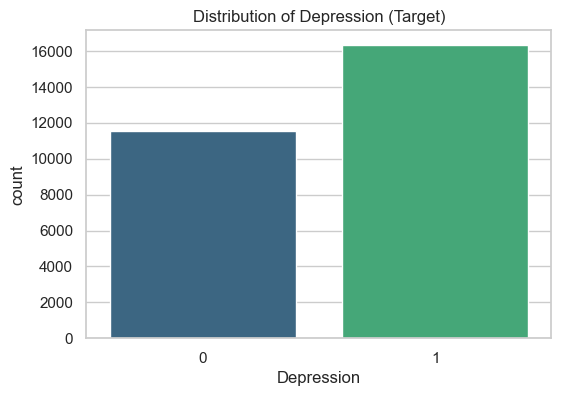

Class Balance:
 Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64


In [2]:
# 2.1 Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df, palette='viridis')
plt.title('Distribution of Depression (Target)')
plt.show()
print("Class Balance:\n", df['Depression'].value_counts(normalize=True))

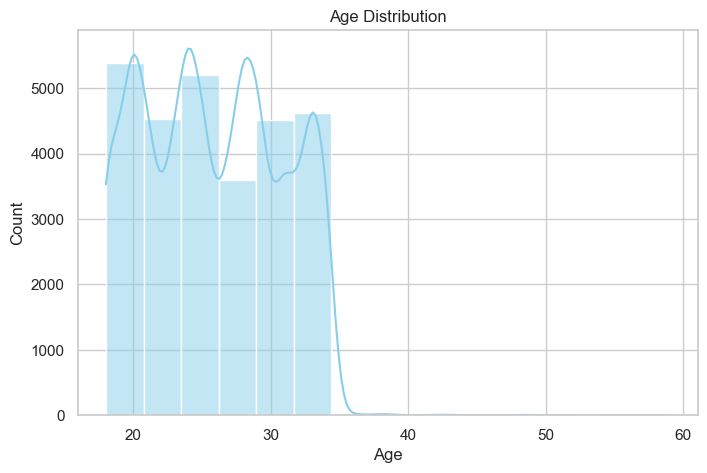

In [3]:
# 2.2 Numerical Feature Distribution (Age)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue')
plt.title('Age Distribution')
plt.show()

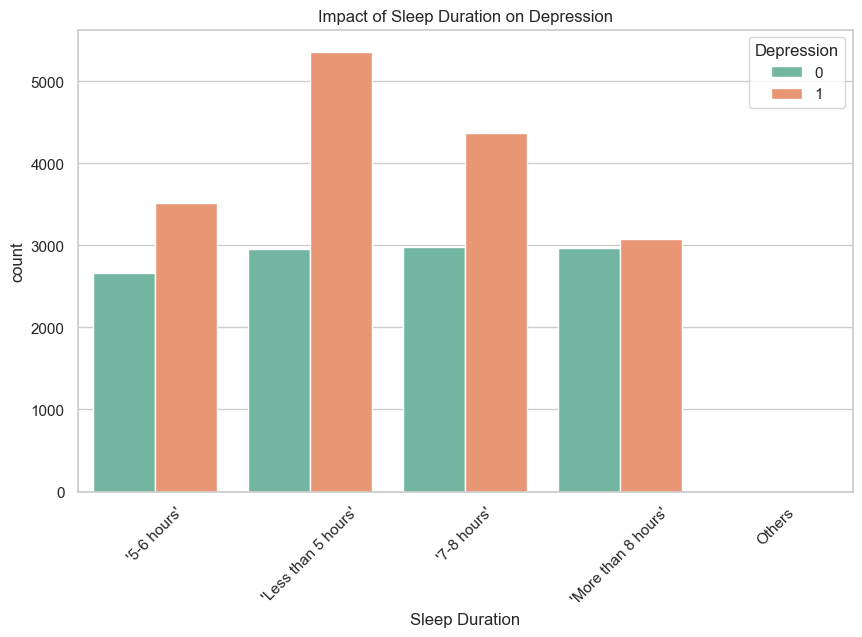

In [4]:
# 2.3 Categorical Analysis (Sleep Duration vs Depression)
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='Set2')
plt.title('Impact of Sleep Duration on Depression')
plt.xticks(rotation=45)
plt.show()

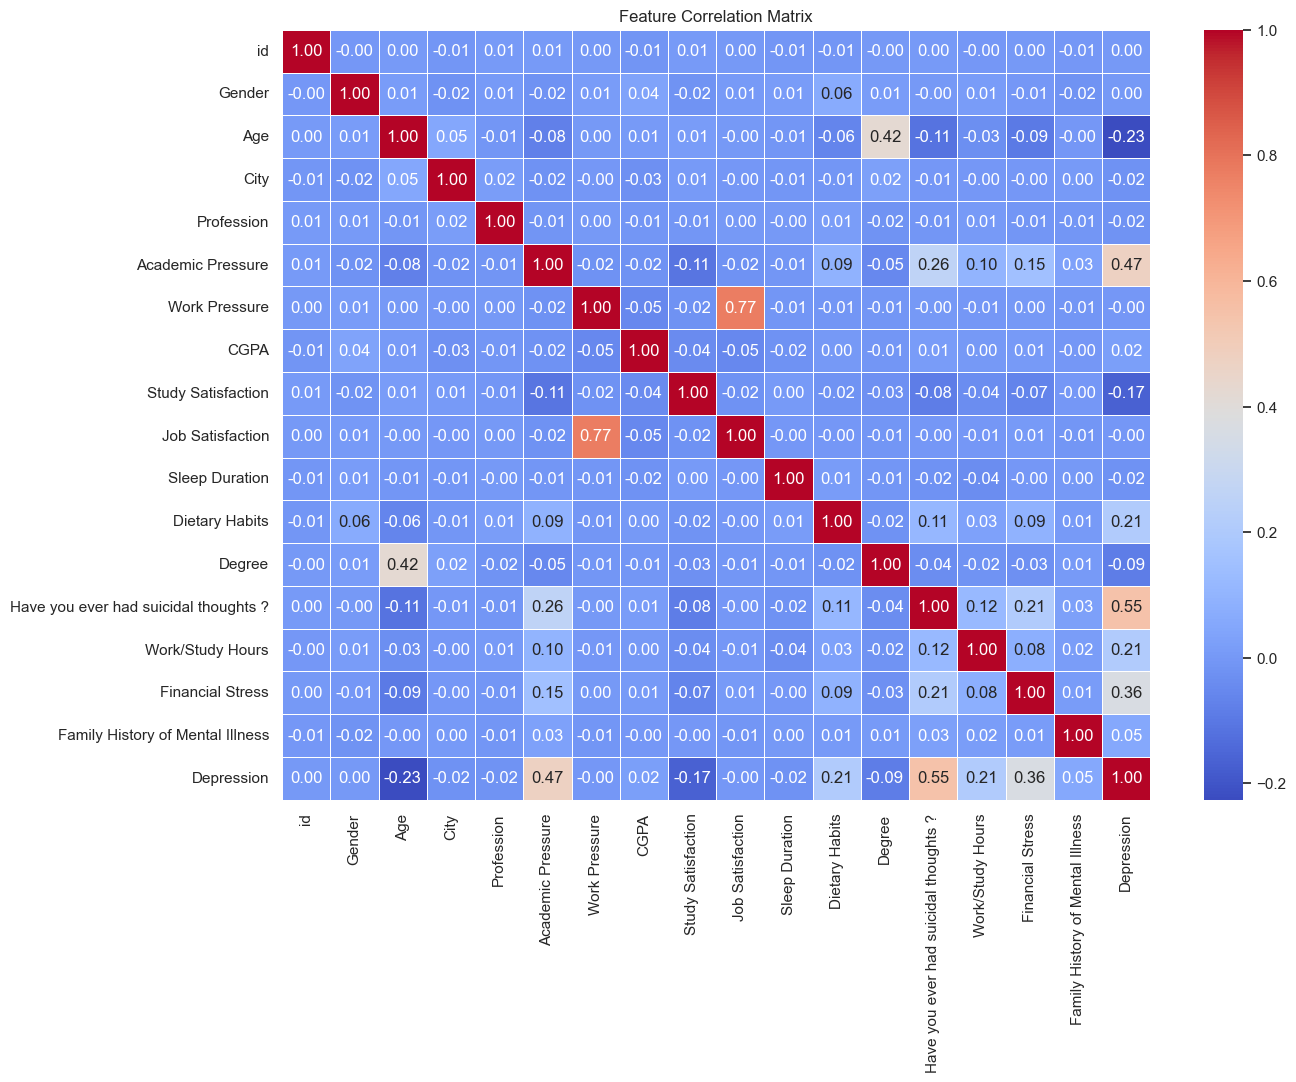

In [5]:
# 2.4 Correlation Heatmap
df_corr = df.copy()
le_temp = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le_temp.fit_transform(df_corr[col].astype(str))

plt.figure(figsize=(14, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

## 3. Data Preprocessing <a id='preprocessing'></a>
Preparing data for Scikit-Learn models.

In [6]:
from sklearn.preprocessing import LabelEncoder

# 1. Drop irrelevant columns
df_clean = df.drop(columns=['id', 'City'], errors='ignore')

# 2. Encode Categorical Variables
le = LabelEncoder()
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# 3. Split Features (X) and Target (y)
feature_names = df_clean.drop('Depression', axis=1).columns
X = df_clean.drop('Depression', axis=1).values
y = df_clean['Depression'].values

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Testing Data Shape: {X_test_scaled.shape}")

Training Data Shape: (22320, 15)
Testing Data Shape: (5581, 15)


## 4. Base Models Implementation <a id='models'></a>
Initializing base models using Scikit-Learn.

In [7]:
# 4.1 Neural Network (MLPClassifier)
# Using architecture similar to our scratch implementation: (Input -> 64 -> 32 -> Output)
nn = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 4.2 Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 4.3 K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

## 5. Initial Model Evaluation <a id='evaluation'></a>
Evaluating base performance.

---- Training Neural Network (MLPClassifier) ----


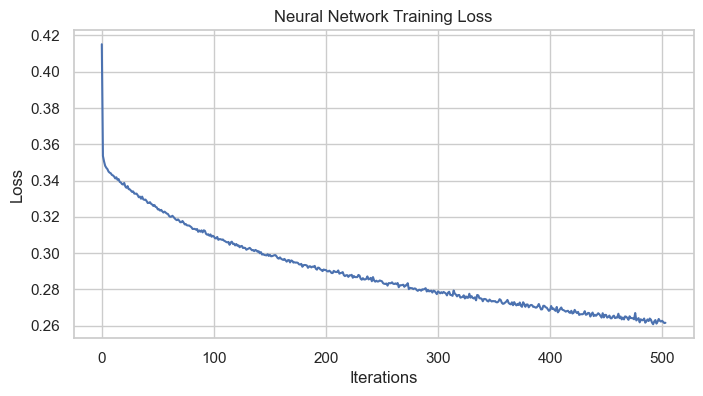

Neural Network Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      2313
           1       0.82      0.89      0.85      3268

    accuracy                           0.82      5581
   macro avg       0.82      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581


---- Training Logistic Regression ----
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581


---- Training KNN (k=5) ----
KNN Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      2313
           1       0.83      0.87      0.85      3268

    accuracy                           0.82      

In [8]:
# 1. Train Neural Network
print("---- Training Neural Network (MLPClassifier) ----")
nn.fit(X_train_scaled, y_train)

# Neural Network Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(nn.loss_curve_)
plt.title('Neural Network Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Evaluate NN
y_pred_nn = nn.predict(X_test_scaled)
print("Neural Network Report:")
print(classification_report(y_test, y_pred_nn))

# 2. Train Logistic Regression
print("\n---- Training Logistic Regression ----")
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# 3. Train KNN
print("\n---- Training KNN (k=5) ----")
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Report:")
print(classification_report(y_test, y_pred_knn))

## 6. Hyperparameter Optimization (GridSearchCV) <a id='optimization'></a>
Using cross-validation to tune **Logistic Regression** and **KNN**.

In [9]:
# 6.1 Optimize Logistic Regression (Grid Search)
# Tuning 'C' (Inverse Regularization Strength)
print("---- Optimizing Logistic Regression (GridSearchCV) ----")
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train_scaled, y_train)

best_log_model = grid_log.best_estimator_
print(f"Best Parameters for LogReg: {grid_log.best_params_}")
print(f"Best CV Accuracy: {grid_log.best_score_:.4f}")

# 6.2 Optimize KNN (Grid Search)
# Tuning 'n_neighbors' (k)
print("\n---- Optimizing KNN (GridSearchCV) ----")
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

best_knn_model = grid_knn.best_estimator_
print(f"Best Parameters for KNN: {grid_knn.best_params_}")
print(f"Best CV Accuracy: {grid_knn.best_score_:.4f}")

---- Optimizing Logistic Regression (GridSearchCV) ----
Best Parameters for LogReg: {'C': 1}
Best CV Accuracy: 0.8467

---- Optimizing KNN (GridSearchCV) ----
Best Parameters for KNN: {'n_neighbors': 11}
Best CV Accuracy: 0.8306


## 7. Feature Selection <a id='features'></a>
Selecting top features based on Correlation.

In [10]:
# Calculate Correlation of each feature with the Target
correlations = []
for i in range(X.shape[1]):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append(abs(corr))

feature_imp = pd.DataFrame({'Feature': feature_names, 'Correlation': correlations})
feature_imp = feature_imp.sort_values(by='Correlation', ascending=False)

print("Top Features by Correlation:")
print(feature_imp.head(10))

# Select Top 5 Features
top_5_features = feature_imp['Feature'].head(5).values
top_5_indices = feature_imp.index[:5].values
print("\nSelected Features:", top_5_features)

# Subset the data
X_train_selected = X_train_scaled[:, top_5_indices]
X_test_selected = X_test_scaled[:, top_5_indices]

Top Features by Correlation:
                                  Feature  Correlation
11  Have you ever had suicidal thoughts ?     0.546277
3                       Academic Pressure     0.474835
13                       Financial Stress     0.363382
1                                     Age     0.226422
12                       Work/Study Hours     0.208563
9                          Dietary Habits     0.206605
6                      Study Satisfaction     0.167971
10                                 Degree     0.086890
14       Family History of Mental Illness     0.053430
8                          Sleep Duration     0.022411

Selected Features: ['Have you ever had suicidal thoughts ?' 'Academic Pressure'
 'Financial Stress' 'Age' 'Work/Study Hours']


## 8. Final Models & Comparative Analysis <a id='final'></a>
Comparison of Optimized Models on Selected Features.


Comparative Analysis (On Test Set with Selected Features):


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.835693,0.846041,0.879437,0.862416
KNN,0.822254,0.837085,0.864749,0.850692


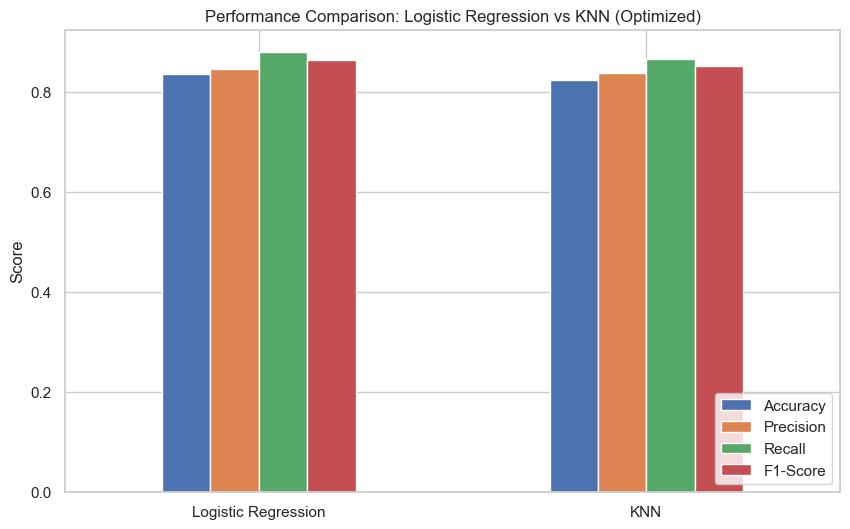

In [11]:
# 1. Retrain Optimized Logistic Regression on Selected Features
final_log = LogisticRegression(C=grid_log.best_params_['C'], max_iter=1000, random_state=42)
final_log.fit(X_train_selected, y_train)
y_pred_final_log = final_log.predict(X_test_selected)

# 2. Retrain Optimized KNN on Selected Features
final_knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
final_knn.fit(X_train_selected, y_train)
y_pred_final_knn = final_knn.predict(X_test_selected)

# 3. Performance Metrics
models = ['Logistic Regression', 'KNN']
predictions = [y_pred_final_log, y_pred_final_knn]

results_df = pd.DataFrame(index=models, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

for name, pred in zip(models, predictions):
    results_df.loc[name, 'Accuracy'] = accuracy_score(y_test, pred)
    results_df.loc[name, 'Precision'] = precision_score(y_test, pred, zero_division=0)
    results_df.loc[name, 'Recall'] = recall_score(y_test, pred, zero_division=0)
    results_df.loc[name, 'F1-Score'] = f1_score(y_test, pred, zero_division=0)

print("\nComparative Analysis (On Test Set with Selected Features):")
display(results_df)

# Bar Chart Comparison
results_df.astype(float).plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison: Logistic Regression vs KNN (Optimized)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## 9. Conclusion <a id='conclusion'></a>

In this analysis:
1. We implemented **Neural Network, Logistic Regression, and KNN** using Scikit-Learn.
2. We used **GridSearchCV** to optimize Hyperparameters.
3. We selected the Top 5 most correlated features.
4. The **Comparative Analysis** highlights the best performing model.